In [1]:
"""
Created on Sat May 4 14:28:18 2019

#Mst. Mahfuja Akter
#Maryam Assaedi
#Mahpara Hyder Chowdhury
"""

import pandas as pd
df = pd.read_excel("Data_Cortex_Nuclear.xls")
#df.mean()
df2 = df.fillna(0)

#b1
col_names = list(df2) # get column names from existing dataframe
groups = df2.groupby('class') # creates a new object of groups of data
output_df = pd.DataFrame(columns = col_names)
count = 1
for index, group_df in groups: 
    if(index == 'c-SC-s') or (index == 't-SC-s'):
        print(index,len(group_df))

c-SC-s 135
t-SC-s 135


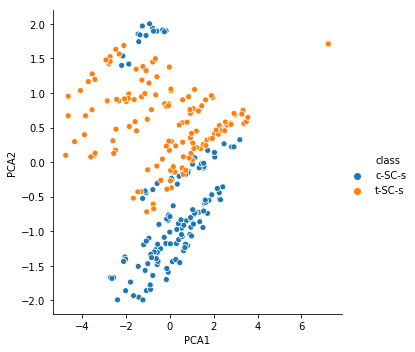

In [3]:
#b2
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df3 = df2[df2.loc[:, 'class'].isin(df[df['class'] == 'c-SC-s']['class'])]
df3 = df3.append(df2[df2.loc[:, 'class'].isin(df[df['class'] == 't-SC-s']['class'])])
finaldf = df3.drop(['MouseID','Genotype','Treatment','Behavior'], axis=1)

X = finaldf.iloc[:, 0:77].values
pca  = PCA(n_components = 2).fit_transform(X)
principalDf = pd.DataFrame(pca)

principalDf.reset_index(drop=True, inplace=True)
finaldf.reset_index(drop=True, inplace=True)

principalDf = pd.concat([principalDf, finaldf[['class']]], axis = 1)
principalDf.columns=['PCA1','PCA2','class']

ax = sns.relplot(x="PCA1", y = "PCA2", hue="class", data = principalDf)
plt.show(ax)

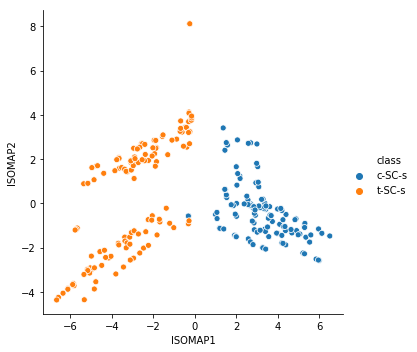

In [4]:
#b3
from sklearn.manifold import Isomap

iso  = Isomap(n_neighbors=10, n_components=2).fit_transform(X)
newIsoDf = pd.DataFrame(data = iso, columns = ['ISOMAP1','ISOMAP2'])

newIsoDf = pd.concat([newIsoDf, finaldf[['class']]], axis = 1)
bx = sns.relplot(x="ISOMAP1", y = "ISOMAP2", hue="class", data = newIsoDf)
plt.show(bx)

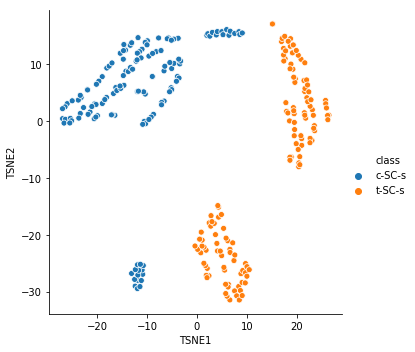

In [71]:
#b4
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,perplexity=20).fit_transform(X)

newTsneDf = pd.DataFrame(data = tsne, columns = ['TSNE1','TSNE2'])
tsnedf = pd.concat([newTsneDf, finaldf[['class']]], axis = 1)

ax = sns.relplot(x="TSNE1", y = "TSNE2", hue="class", data = tsnedf)
plt.show(ax)